# This notebook post-processes data from GITR

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
from mpl_toolkits import mplot3d
import io, libconf
import os

In [2]:
import matplotlib
from matplotlib import pyplot as plt

In [3]:
path= "/Users/42d/WEST/Bfield/glueCode_proofOfConcept-master/DB/Skyrme/skyrme_model/WEST/"

filename=path+"input/gitrGeometry.cfg"

with io.open(filename) as f:
    config = libconf.load(f)

x1 = np.array(config.geom.x1)
x2 = np.array(config.geom.x2)
z1 = np.array(config.geom.z1)
z2 = np.array(config.geom.z2)
Z = np.array(config.geom.Z)

y1 = np.array(config.geom.y1)
y2 = np.array(config.geom.y2)
ys1 = np.ones(x1.size) * y1
ys2 = np.ones(x1.size) * y2

inDir = np.array(config.geom.inDir)

In [4]:
config.geom.keys()

odict_keys(['x1', 'z1', 'x2', 'z2', 'slope', 'intercept', 'length', 'Z', 'surface', 'inDir', 'y1', 'y2', 'periodic'])

In [5]:
# # positions.nc
# pos=nc.Dataset(path+'output/positions.nc')

In [6]:
hist=nc.Dataset(path+'output/history.nc')

x=np.array(hist['x'][...]) 
y=np.array(hist['y'][...]) 
z=np.array(hist['z'][...]) 

vx = np.array(hist.variables['vx'])
vy = np.array(hist.variables['vy'])
vz = np.array(hist.variables['vz'])

charge = np.array(hist.variables['charge'])

In [7]:
pts = np.random.randint(1,len(x),1000).tolist() #XXX: slight chance of duplicates

In [8]:
len(x)

10210

Text(0, 0.5, 'z [m]')

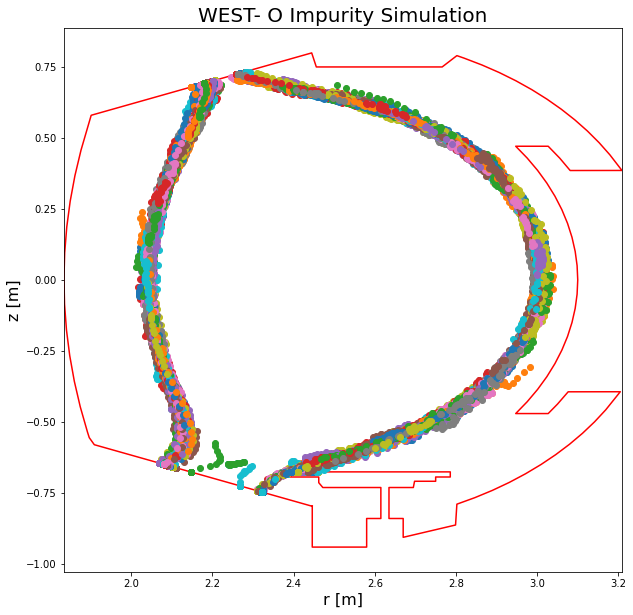

In [9]:

fig = plt.figure(figsize=(10,10))

plt.plot(np.append(x1,x1[0]), np.append(z1,z1[0]) ,'r')

# for i in range(len(x)): #pts:
for i in pts:
    r=np.sqrt(x[i]*x[i]+y[i]*y[i])
    plt.plot(r,z[i], 'o')
    
plt.autoscale(enable=True, axis='x', tight=True)
plt.title('WEST- O Impurity Simulation', fontsize=20)
plt.xlabel('r [m]', fontsize=16)
plt.ylabel('z [m]', fontsize=16)

In [10]:
spec=nc.Dataset(path+'output/spec.nc')
spec

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): nBins(7), nR(2000), nZ(2000)
    variables(dimensions): float64 n(nBins, nZ, nR), float64 gridR(nR), float64 gridZ(nZ)
    groups: 

In [11]:
spec['n'][...].shape

(7, 2000, 2000)

In [12]:
spec['n'][...][1,:,:].shape

(2000, 2000)

In [13]:
s=[max(np.unique(spec['n'][...][i,:,:])) for i in range(7)]

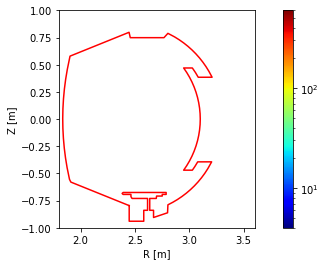

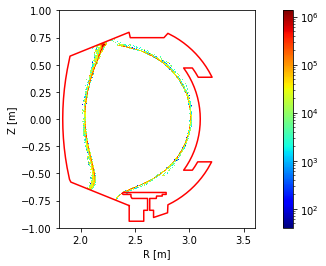

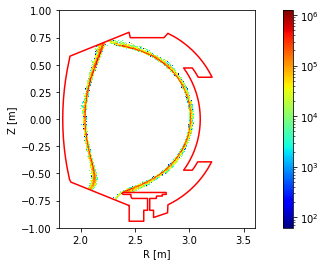

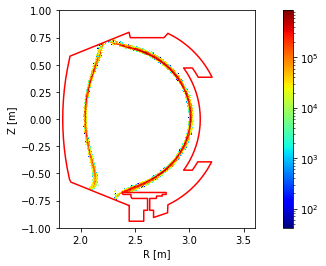

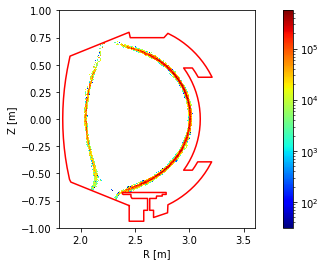

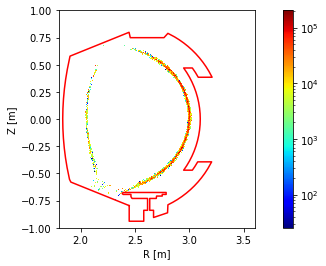

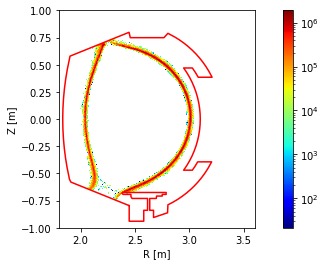

In [19]:
colormap='jet'
for i in range(0,7,1):
    fig = plt.figure(i, figsize=(10, 4))
    ax = fig.add_subplot(111)
#     x,y = np.meshgrid(denss, temps)

    Xmin=1e100
    Xmax=-1e100
    dens=spec['n'][...][i,:,:]
    Xmin=min(Xmin,np.min(dens))
    Xmax=max(Xmax,np.max(dens))

    cmin=Xmin
    cmax=Xmax
    sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=cmin, vmax=cmax))

    # Contour the plot and grab its colorset.
#     cs = ax.contourf(x,y, zbar.T, 256)
# 
#     plt.contour(r2D,z2D,psi2D,levels=[psisep[0]])
    plt.plot(np.append(x1,x1[0]), np.append(z1,z1[0]) ,'r')

    # Create a colorbar based on the contourset from earlier.
    # This will be put on its own axes.
#     cb = fig.colorbar(cs, ticks=matplotlib.ticker.MaxNLocator(nbins=15))
#     cb.set_label("Average Ionization")
    colormap = 'jet'
    c=ax.pcolormesh(spec['gridR'], spec['gridZ'], dens, cmap=colormap,norm=matplotlib.colors.LogNorm())
#     plt.xlim([np.min(Rwall),np.max(Rwall)])
#     plt.ylim([np.min(Zwall),np.max(Zwall)])
    plt.xlim([1.8343051, 3.1984692])
    plt.ylim([-0.94, 0.7986])
    ax.set_xlabel(r'R [m]')
    ax.set_ylabel(r'Z [m]')
    plt.axis('scaled')
    plt.colorbar(c)

In [16]:
# def nc_plotHist(filename='ouplot=1tput/history.nc', plot=1):
plot=1
filename=path+'output/history.nc'
ncFile = nc.Dataset(filename, "r")

nT = ncFile.dimensions['nT'].size
nP = ncFile.dimensions['nP'].size

x = np.reshape(np.array(ncFile.variables['x']), (nP, nT))
y = np.reshape(np.array(ncFile.variables['y']), (nP, nT))
z = np.reshape(np.array(ncFile.variables['z']), (nP, nT))

vx = np.reshape(np.array(ncFile.variables['vx']), (nP, nT))
vy = np.reshape(np.array(ncFile.variables['vy']), (nP, nT))
vz = np.reshape(np.array(ncFile.variables['vz']), (nP, nT))

charge = np.reshape(np.array(ncFile.variables['charge']), (nP, nT))
weight = np.reshape(np.array(ncFile.variables['weight']), (nP, nT))

r = np.sqrt(np.multiply(x, x) + np.multiply(y, y))

In [ ]:
np.unique(vx)

saving tracksRZ


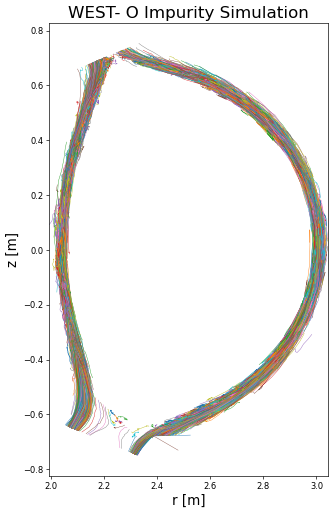

saving tracksXY


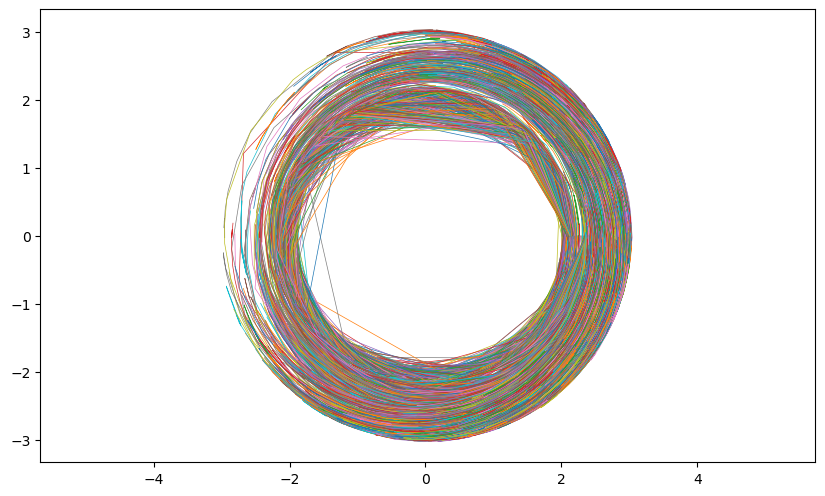

In [20]:
# print('z ', z[:,0])
# print('x ', x.shape)
# print('x ', x[0,:])
# print('r ', r.shape)
# print('z ', z[0][:].shape)
#for i in range(nT):
#    print('r,z ',i, x[i][0],z[i][0])
single = x[0][:];
if plot == 1:
    plt.close()
    plt.figure(1, figsize=(6, 10), dpi=60)
    # plot2dGeom(filename='../input/gitrGeometry.cfg')
    if (x.shape[0] == 1):
        plt.plot(r[0][:], z[0][:], linewidth=5, color='green')
    else:
        for i in range(nP):
            # print('i', i)
            #              print('size', r[:,i].size)
            #              print('r ', r[:,i])
            plt.plot(r[i, :], z[i, :], linewidth=0.5)
    #              #plt.plot(r[i,:],z[i,:],linewidth=1.0)
    #              #plt.setp(linewidth=0.2)
    # plt.xlim((5.3,6.0))
    # plt.ylim((-4.4,-3.0))
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.title('WEST- O Impurity Simulation', fontsize=20)
    plt.xlabel('r [m]', fontsize=16)
    plt.ylabel('z [m]', fontsize=16)
    # plt.axis('equal')
    print('saving tracksRZ')
    plt.savefig('tracksRZ.png')
    plt.show()
    plt.close()
    plt.figure(1, figsize=(10, 6), dpi=100)
    if (x.shape[0] == 1):
        plt.plot(x[0][:], y[0][:], linewidth=0.5)
    else:
        for i in range(nP):
            # print('i', i)
            plt.plot(x[i, :], y[i, :], linewidth=0.5)
    # plt.ylim((-0.02,0.02))
    # plt.xlim((-0.02,0.02))
#     plt.autoscale(enable=True, axis='x', tight=True)
    plt.axis('equal')
    print('saving tracksXY')
    plt.savefig('tracksXY.png')
    plt.show()
# return x, y, z, r, vx, vy, vz, charge, weight, nP, nT

### Number of charge states in the plasma

In [ ]:
!pwd

In [17]:
print('Z =', np.unique(charge))

Z = [1. 2. 3. 4. 5. 6. 7.]


In [ ]:
# data=nc.Dataset(path+'profiles.nc')

In [ ]:
# max(np.unique(data['vr'][...]))

In [ ]:
# max(np.unique(data['vz'][...]))

In [ ]:
# pos=nc.Dataset('/Users/42d/WEST/output/particleSource.nc')

In [ ]:
# pos

In [ ]:
# len(pos['vx'][...])

In [ ]:
# s=abs(np.unique(pos['vx'][...]))
# min(x), max(s)

In [ ]:
# from matplotlib.colors import BoundaryNorm
# from matplotlib.ticker import MaxNLocator

# bfield=nc.Dataset('/Users/42d/GITR_processing/examples/west/helium/input/bfield.nc')
# br=bfield['br'][...]
# bt=bfield['bt'][...]
# bz=bfield['bz'][...]
# r=bfield['r'][...]
# z=bfield['z'][...]
# # levels = MaxNLocator(nbins=15).tick_values(z.min(), z.max())
# levels = MaxNLocator(nbins=15).tick_values(bz.min(), bz.max())
# fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(12,4))
# ax1.pcolormesh(r, z, bt)
# ax2.pcolormesh(r, z, br)
# ax3.pcolormesh(r, z, bz)
# fig.tight_layout()

In [ ]:
# bfield=nc.Dataset('/Users/42d/WEST/input/profiles.nc')
# br=bfield['br'][...]
# bt=bfield['bt'][...]
# bz=bfield['bz'][...]
# r=bfield['gridR'][...]
# z=bfield['gridZ'][...]
# # levels = MaxNLocator(nbins=15).tick_values(z.min(), z.max())

# fig, (ax1,ax2,ax3) = plt.subplots(1,3)
# ax1.pcolormesh(r, z, br)
# ax2.pcolormesh(r, z, bt)
# ax3.pcolormesh(r, z, bz)
# fig.tight_layout()